#### Super Store EDA Anaysis
### Author: Asad Ur Reman
### Date: 07-Dec-2023
### website: Asad195@carrd.co

In [1]:
# Importin libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset

df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#### Understaning Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### Data Cleaning

In [5]:
# Checking null values

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
# Postal Code have some null values. I will fill those will 0. Although these are only few and we can drop rows too.
# But i will fill these values

df['Postal Code'].fillna(0, inplace=True)
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [20]:
# Converting Postal Code type from float to Int

df['Postal Code'] = df['Postal Code'].astype(int)


### Exploatory Data Analysis
##### Customer Segmentation

In [21]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [22]:
# Checking unique values for Segment

df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

##### No of Orders by Each Segment

In [32]:
# Checking No of order by segment

# Counting no of orders by segment and conveting it into table format
segment_count = df['Segment'].value_counts().reset_index()

# Renaming Colum
segment_count = segment_count.rename(columns={'count': 'Total No of orders'})

# printing dataset
segment_count

,Segment,Total No of orders
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


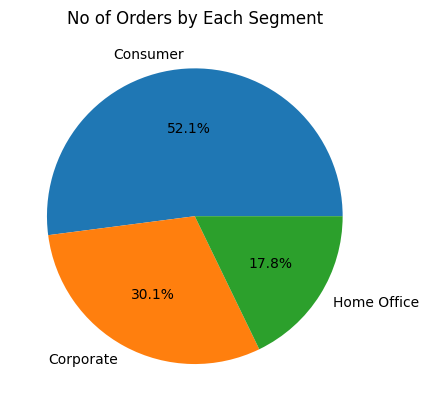

In [36]:
# Making pie plot for better view

# Pie plot showing pecentage of each segment
plt.pie(segment_count['Total No of orders'], labels= segment_count['Segment'], autopct='%1.1f%%')

# Wrting Plot title
plt.title('No of Orders by Each Segment')

# Showing plot
plt.show()


##### By this Analysis we can easily see that **Consumer Segment** have highest number of orders then Coporate and Home office respectively.

##### Diving Segments by Sales

In [42]:

# Grouped Segment to see their sales total and reset indexs to convert it into table
segment_revenue = df.groupby(['Segment'])['Sales'].sum().reset_index()

# Renaming Segment
segment_revenue = segment_revenue.rename(columns={'Sales': 'Total Revenue'})

# Prinying table
segment_revenue

,Segment,Total Revenue
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


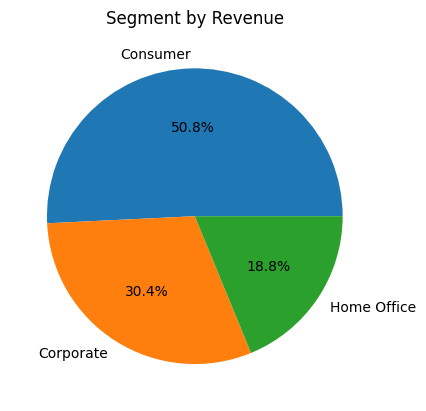

In [44]:
# Making pie plot to see highest revenue segment

# Pie plot showing pecentage of each segment
plt.pie(segment_revenue['Total Revenue'], labels=segment_revenue['Segment'], autopct='%1.1f%%')

# Wrting Plot title
plt.title('Segment by Revenue')

# Showing plot
plt.show()



##### By this Analysis we fount that **Consumer Segment** have highest number of sales then Coporate and Home office respectively.

##### In Segment analysis **Consumer Segment** have the higest *No of orders* and *No of Sales*.

### Customer Loyalty

In [51]:

# Grouped customers to count their no of order
loyal_customer = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

# Sort table by higt to low 
loyal_customer = loyal_customer.sort_values('Order ID', ascending=False)

# Top 10 Customers by No of order and reset index 
loyal_customer = loyal_customer.head(10).reset_index(drop=True)

# Printing table
loyal_customer

,Customer ID,Customer Name,Segment,Order ID
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
5,SV-20365,Seth Vernon,Consumer,32
6,JD-15895,Jonathan Doherty,Corporate,32
7,AP-10915,Arthur Prichep,Consumer,31
8,ZC-21910,Zuschuss Carroll,Consumer,31
9,EP-13915,Emily Phan,Consumer,31


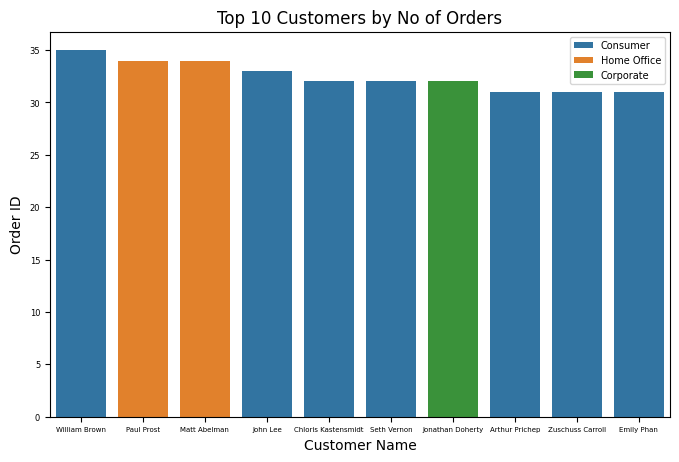

In [75]:

# Adjusting Figure size
plt.figure(figsize=(8, 5))

# Making Bar plot
sns.barplot(loyal_customer, x='Customer Name', y='Order ID', hue='Segment' )

# Formating plot
plt.xticks(fontsize = 5)
plt.yticks(fontsize = 6)
plt.title('Top 10 Customers by No of Orders')
plt.legend(fontsize = 7)
plt.show()


##### By this analysis we got **Top 10 Customers** by their _No of Orders_.

In [69]:

# Grouped by customers ID, Segment and Name to find sum of revnue  
loyal_customer_revenue = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# Sorted table from higest to lowest
loyal_customer_revenue = loyal_customer_revenue.sort_values('Sales', ascending=False)

# Top 10 Customer by revenue 
loyal_customer_revenue = loyal_customer_revenue.head(10).reset_index(drop=True)

# Printing Table
loyal_customer_revenue

,Customer ID,Customer Name,Segment,Sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


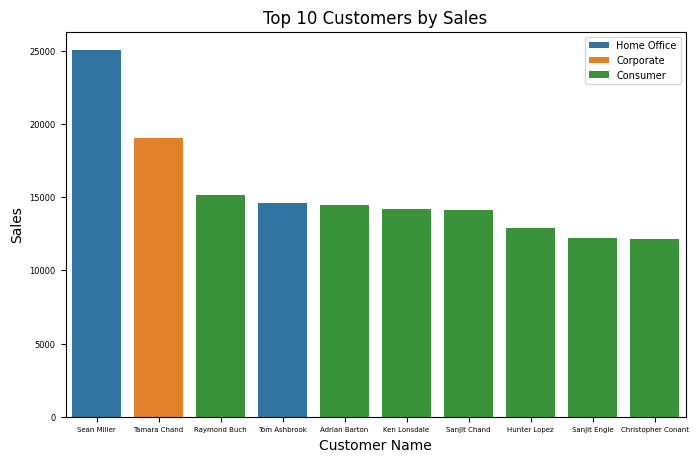

In [76]:
# Bar plot

# Adjusting Figure size
plt.figure(figsize=(8, 5))

# Making Bar plot
sns.barplot(loyal_customer_revenue, x='Customer Name', y='Sales', hue='Segment')

# Formating plot
plt.xticks(fontsize = 5)
plt.yticks(fontsize = 6)
plt.title('Top 10 Customers by Sales')
plt.legend(fontsize = 7)
plt.show()



##### We got **Top 10 Customers** by _Sales_

##### By customer loyaty we can check that which customer is most repeated. While we can see that the customer who have more number of order isnt one who have highest Sales. So this can be because of product prices difference in each Segment.

#### Shipment Mode

In [77]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [83]:
# Most used shipping method

# Group by  Shipping Mode
shipping_method = df.groupby(['Ship Mode'])['Order ID'].count().reset_index()

# Renaming Columns
shipping_method = shipping_method.rename(columns={'Order ID': 'No of Orders'})

# Sorting Columns
shipping_method = shipping_method.sort_values('No of Orders', ascending=False)

# Printing Table
shipping_method

,Ship Mode,No of Orders
3,Standard Class,5859
2,Second Class,1902
0,First Class,1501
1,Same Day,538


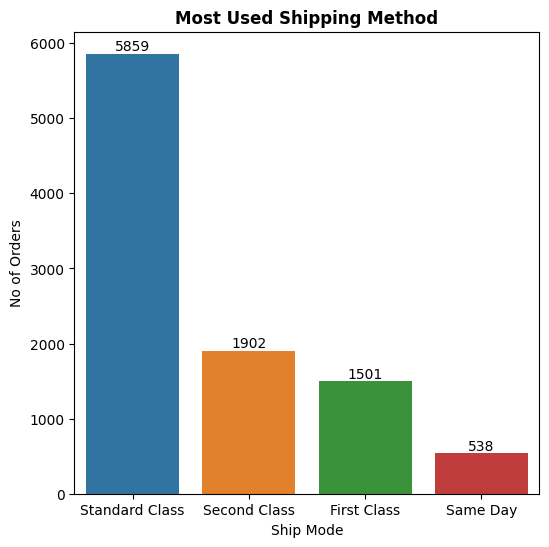

In [108]:

from matplotlib import container
from matplotlib.pyplot import annotate


plt.figure(figsize=(6, 6))

# Bar Plot
ax = sns.barplot(shipping_method, x='Ship Mode', y='No of Orders', hue='Ship Mode')

# Get all bar Container
containers = ax.containers

# Labeling all bars

for container in containers:
    ax.bar_label(container)

# Labeling

plt.title('Most Used Shipping Method', fontweight = 700)
plt.show()

#### Geographical Analysis

#### Top 10 States by No of orders

In [121]:

# Grouped by State
state_order = df.groupby('State')['Order ID'].count().reset_index()

# Sorting Values
state_order = state_order.sort_values('Order ID', ascending=False)

# Droping Index
state_order = state_order.head(10).reset_index(drop=True)

# Printing table
state_order

,State,Order ID
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


C:\Users\Asad Ur Rehman\AppData\Local\Temp\ipykernel_19060\3125462540.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  ax = sns.barplot(state_order, x='State', y='Order ID', hue='Order ID', color= 'skyblue')


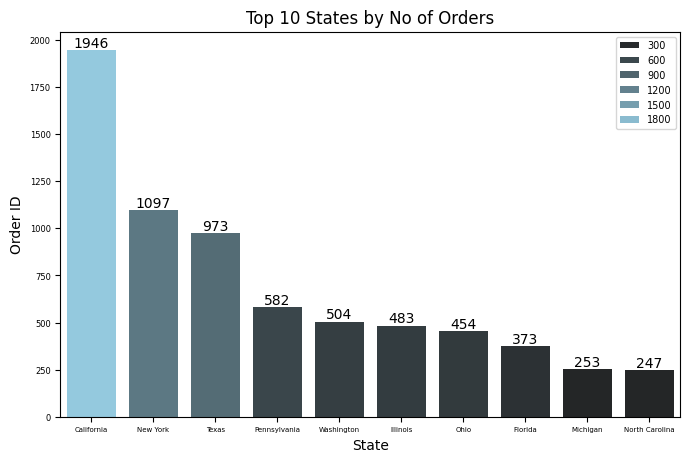

In [130]:
# Bar plot

# Adjusting Figure size
plt.figure(figsize=(8, 5))

# Making Bar plot
ax = sns.barplot(state_order, x='State', y='Order ID', hue='Order ID', color= 'skyblue')

# Adding title and label figure
containers = ax.containers

for container in containers:
    ax.bar_label(container)
    

# Formating plot
plt.xticks(fontsize = 5)
plt.yticks(fontsize = 6)
plt.title('Top 10 States by No of Orders')
plt.legend(fontsize = 7)
plt.show()

#### Top 10 Cities by No of orders

In [128]:
# Grouped by State
city_order = df.groupby('City')['Order ID'].count().reset_index()

# Sorting Values
city_order = city_order.sort_values('Order ID', ascending=False)

# Droping Index
city_order = city_order.head(10).reset_index(drop=True)

# Printing table
city_order

,City,Order ID
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


C:\Users\Asad Ur Rehman\AppData\Local\Temp\ipykernel_19060\518010739.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  ax = sns.barplot(city_order, x='City', y='Order ID', hue='Order ID', color= 'skyblue')


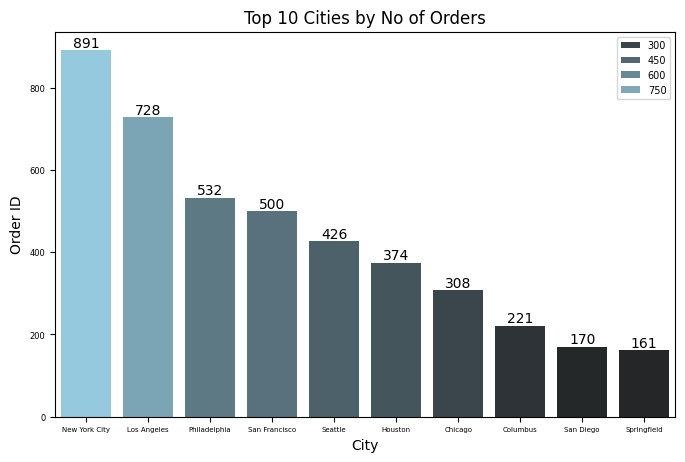

In [132]:
# Bar plot

# Adjusting Figure size
plt.figure(figsize=(8, 5))

# Making Bar plot
ax = sns.barplot(city_order, x='City', y='Order ID', hue='Order ID', color= 'skyblue')

# Adding title and label figure
containers = ax.containers

for container in containers:
    ax.bar_label(container)
    

# Formating plot
plt.xticks(fontsize = 5)
plt.yticks(fontsize = 6)
plt.title('Top 10 Cities by No of Orders')
plt.legend(fontsize = 7)
plt.show()

#### Top Catagories and Sub-Categories by No of Orders

In [138]:

# Grouping Category and Sub-Cateory
product_category = df.groupby('Category')['Sub-Category'].value_counts().groupby(level=0, group_keys=False).nlargest(10)

# Reseting Index
product_category = product_category.reset_index()

# Printing table
product_category

,Category,Sub-Category,count
0,Furniture,Furnishings,931
1,Furniture,Chairs,607
2,Furniture,Tables,314
3,Furniture,Bookcases,226
4,Office Supplies,Binders,1492
5,Office Supplies,Paper,1338
6,Office Supplies,Storage,832
7,Office Supplies,Art,785
8,Office Supplies,Appliances,459
9,Office Supplies,Labels,357


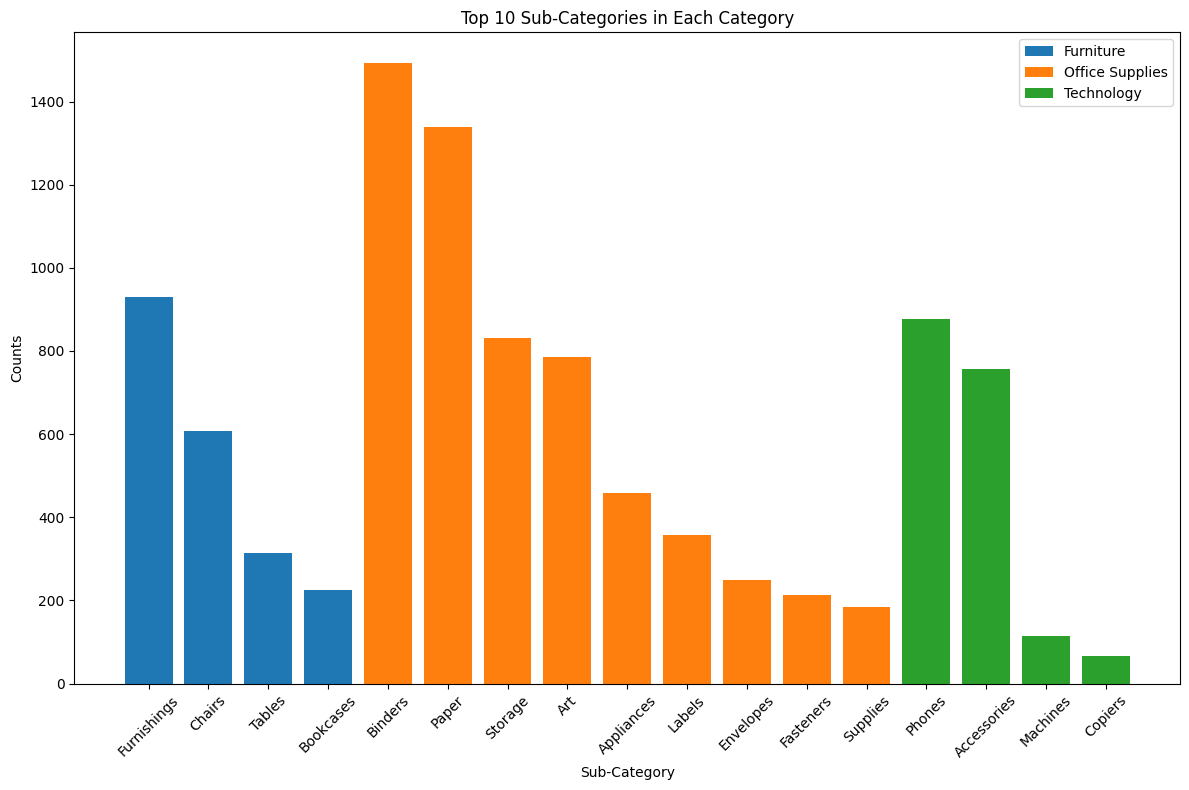

In [150]:

# Sub Plotting
fig, ax = plt.subplots(figsize=(12, 8))
for category, data in product_category.groupby('Category'):
    ax.bar(data['Sub-Category'], data['count'], label=category)

# Title and Labeling
plt.xlabel('Sub-Category')
plt.ylabel('Counts')
plt.title('Top 10 Sub-Categories in Each Category')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [152]:
# Grouping Category and Sub-Cateory
product_category_by_revenue = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().groupby(level=0, group_keys=False).nlargest(10)

# Reseting Index
product_category_by_revenue = product_category_by_revenue.reset_index()

# Printing table
product_category_by_revenue

,Category,Sub-Category,Sales
0,Furniture,Chairs,322822.7310
1,Furniture,Tables,202810.6280
2,Furniture,Bookcases,113813.1987
3,Furniture,Furnishings,89212.0180
4,Office Supplies,Storage,219343.3920
5,Office Supplies,Binders,200028.7850
6,Office Supplies,Appliances,104618.4030
7,Office Supplies,Paper,76828.3040
8,Office Supplies,Supplies,46420.3080
9,Office Supplies,Art,26705.4100


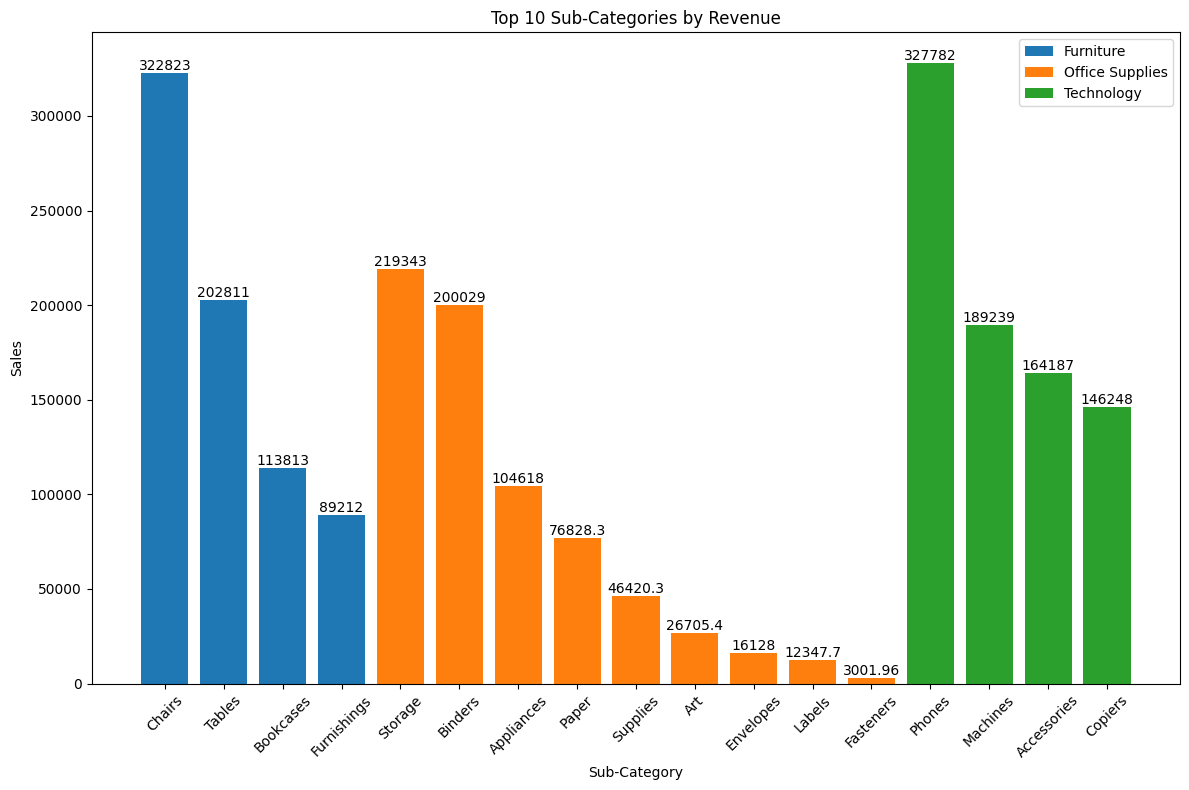

In [162]:

from cProfile import label

# Figure Size
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
for category, data in product_category_by_revenue.groupby('Category'):
    ax.bar(data['Sub-Category'], data['Sales'], label= category)

containers = ax.containers

# Showing total on each bar
for conatiner in containers:
    ax.bar_label(conatiner)

# Title and Labeling
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Top 10 Sub-Categories by Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


    

### Sales Analysis

In [164]:
# Unique Years

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Order Date'].dt.year.unique()

array([2017, 2016, 2015, 2018])

In [172]:

# Grouping Year and Months
year_and_months = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month])['Sales'].sum()

# Showing Data
year_and_months

Order Date  Order Date
2015        1              14205.7070
            2               4519.8920
            3              55205.7970
            4              27906.8550
            5              23644.3030
            6              34322.9356
            7              33781.5430
            8              27117.5365
            9              81623.5268
            10             31453.3930
            11             77907.6607
            12             68167.0585
2016        1              18066.9576
            2              11951.4110
            3              32339.3184
            4              34154.4685
            5              29959.5305
            6              23599.3740
            7              28608.2590
            8              36818.3422
            9              63133.6060
            10             31011.7375
            11             75249.3995
            12             74543.6012
2017        1              18542.4910
            2              

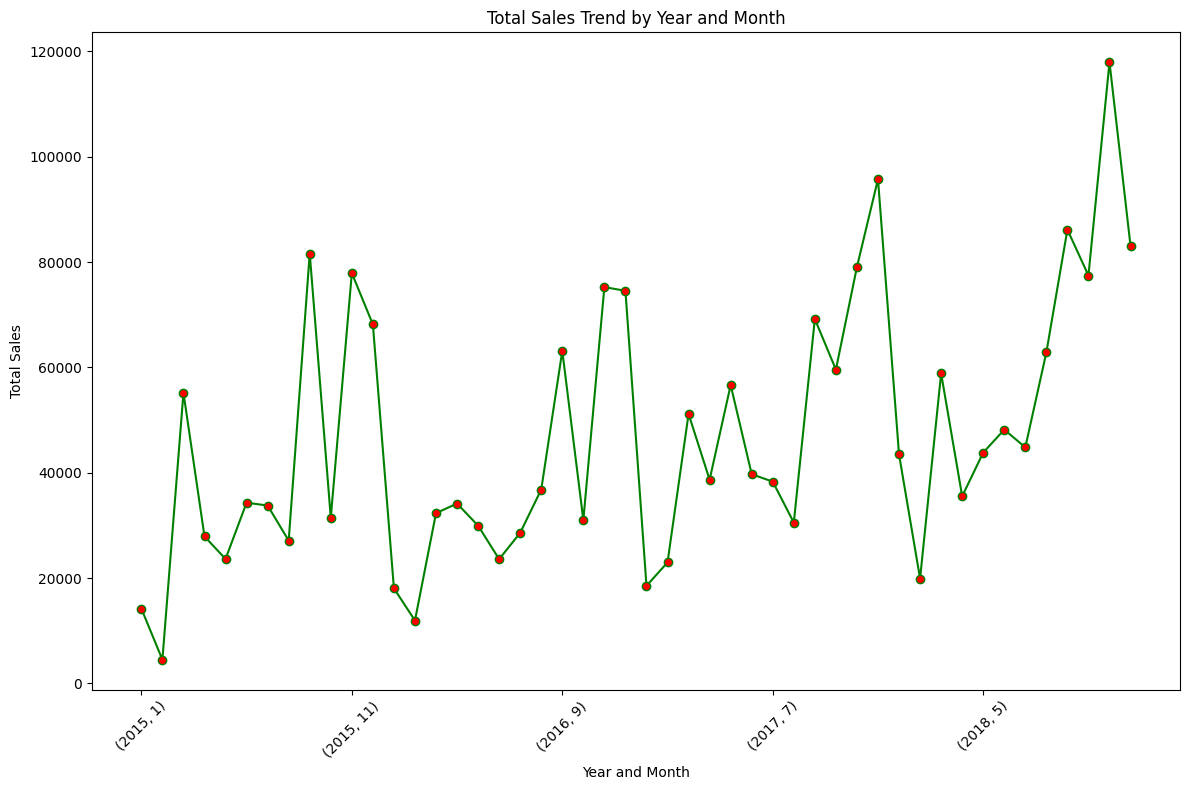

In [177]:
from turtle import color
from matplotlib import markers

# Fiure Size
plt.figure(figsize=(12, 8))

#Plotting
year_and_months.plot(kind='line', marker = 'o', color='green', markerfacecolor = 'red')

# Label and Title
plt.xlabel('Year and Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Trend by Year and Month')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

#### Quarterly Sale for 2017

In [181]:

# filtering Year
quarter_sale = df[df['Order Date'].dt.year == 2017]

# Selecting Quarter Sale
quarter_sale = quarter_sale.resample('Q', on='Order Date')['Sales'].sum()

# resting index
quarter_sale = quarter_sale.reset_index()

# printing table
quarter_sale

,Order Date,Sales
0,2017-03-31,92686.3650
1,2017-06-30,135061.1610
2,2017-09-30,138056.3742
3,2017-12-31,234388.6498


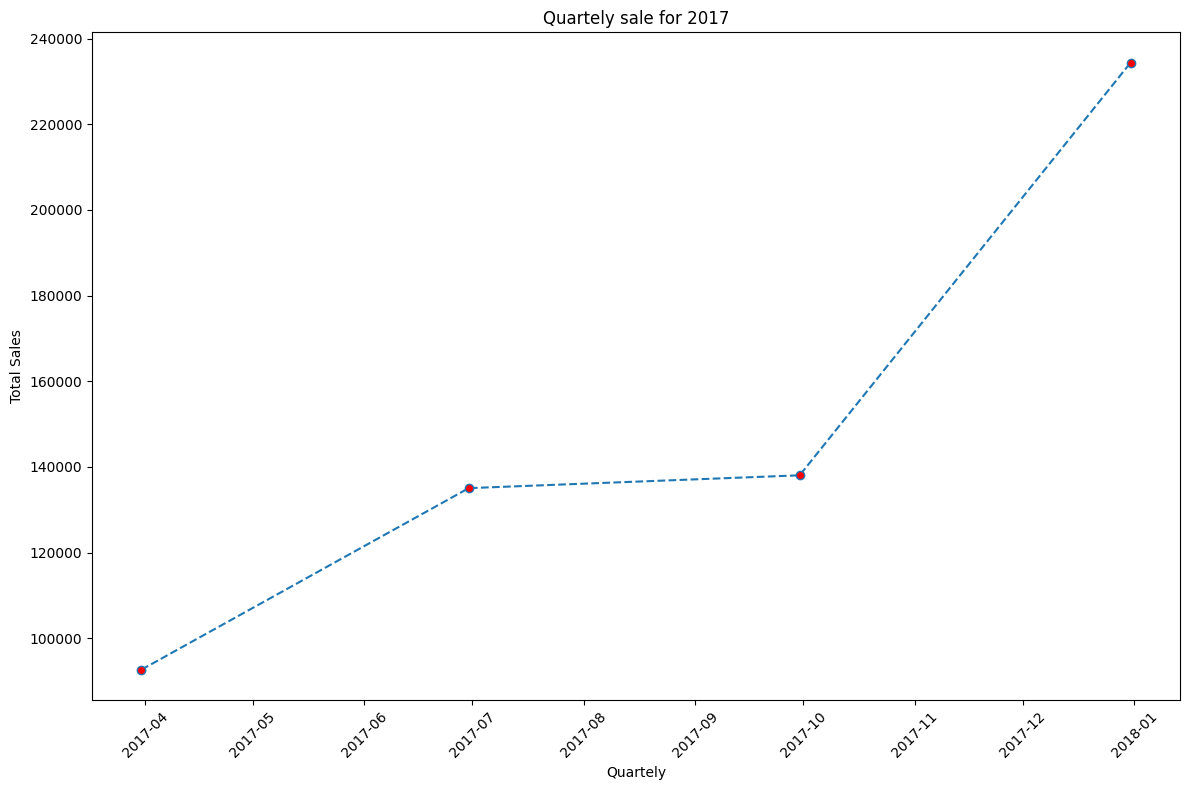

In [191]:
# Plotting

# Figure Size
plt.figure(figsize=(12, 8))

# Plotting 
plt.plot(quarter_sale['Order Date'], quarter_sale['Sales'], marker = 'o', linestyle= '--', markerfacecolor = 'red')

# Label and Title
plt.xlabel('Quartely')
plt.ylabel('Total Sales')
plt.title('Quartely sale for 2017')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()



In [193]:
# filtering Year
monthly_sale = df[df['Order Date'].dt.year == 2017]

# Selecting Monthly Sale
monthly_sale = monthly_sale.resample('M', on='Order Date')['Sales'].sum()

# resting index
monthly_sale = monthly_sale.reset_index()

# printing table
monthly_sale

,Order Date,Sales
0,2017-01-31,18542.4910
1,2017-02-28,22978.8150
2,2017-03-31,51165.0590
3,2017-04-30,38679.7670
4,2017-05-31,56656.9080
5,2017-06-30,39724.4860
6,2017-07-31,38320.7830
7,2017-08-31,30542.2003
8,2017-09-30,69193.3909
9,2017-10-31,59583.0330


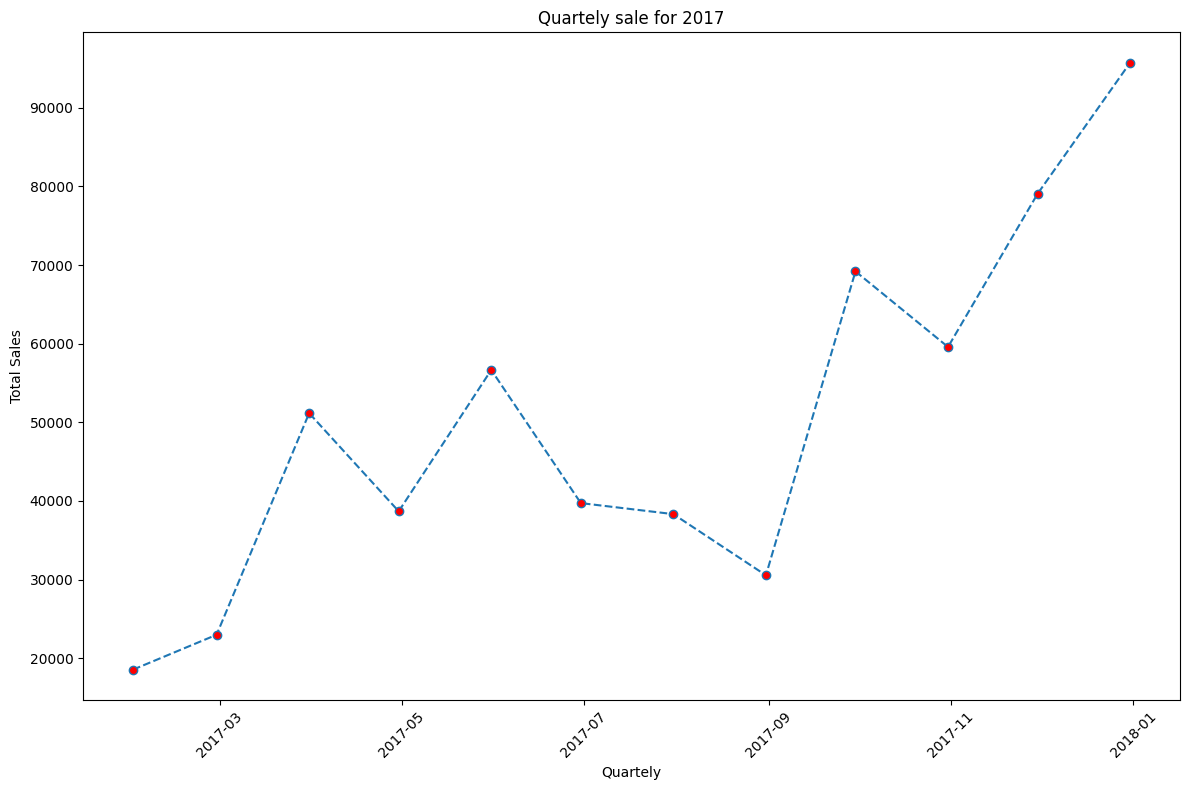

In [194]:
# Plotting

# Figure Size
plt.figure(figsize=(12, 8))

# Plotting 
plt.plot(monthly_sale['Order Date'], monthly_sale['Sales'], marker = 'o', linestyle= '--', markerfacecolor = 'red')

# Label and Title
plt.xlabel('Quartely')
plt.ylabel('Total Sales')
plt.title('Quartely sale for 2017')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()
